# 5.5.4 Advanced Experimentation - What test to use.ipynb 

In this dataset, the same participants answered questions in 2012 and again 2014.

1.Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

2.Did people become happier from 2012 to 2014? Compute results for each country in the sample.

3.Who reported watching more TV in 2012, men or women?

4.Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

5.Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

6.Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [16]:
countries=df.cntry.unique().tolist()

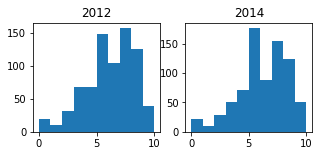

C:\Users\ankush\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ankush\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


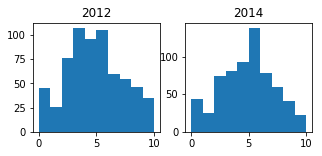

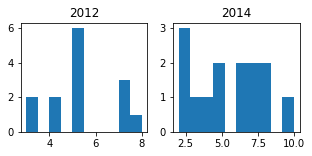

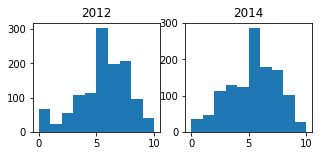

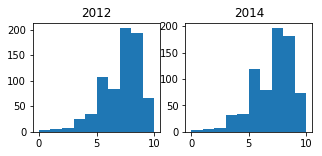

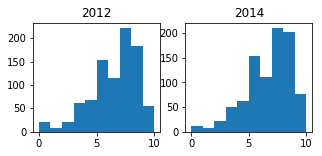

In [17]:
for country in countries:
    fig, ax1 = plt.subplots(1, 2, figsize=(5, 2))

    ax1[0].hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)])
    ax1[1].hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)])

    ax1[0].set_title('2012')
    ax1[1].set_title('2014')
    
    plt.show()

In [33]:

for country in countries:
    print(country)
    print('2012 mean: {0:.2f}' .format(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)].mean()))
    print('2014 mean: {0:.2f}' .format(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)].mean()))
    print(stats.ttest_ind(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)], 
                          df['ppltrst'][(df['cntry'] == country) & (df['year']==7)],nan_policy='omit'
                         ))

CH
2012 mean: 5.68
2014 mean: 5.75
Ttest_indResult(statistic=-0.6782716584661505, pvalue=0.49770110247151234)
CZ
2012 mean: 4.36
2014 mean: 4.42
Ttest_indResult(statistic=-0.47654431369598554, pvalue=0.6337663626855166)
DE
2012 mean: 5.21
2014 mean: 5.36
Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8578926631223287)
ES
2012 mean: 5.11
2014 mean: 4.90
Ttest_indResult(statistic=2.4942765167160026, pvalue=0.012687599930346013)
NO
2012 mean: 6.65
2014 mean: 6.60
Ttest_indResult(statistic=0.5437669865283744, pvalue=0.586684963598745)
SE
2012 mean: 6.06
2014 mean: 6.26
Ttest_indResult(statistic=-2.089164843127998, pvalue=0.036832086995183345)


There is no consistent trend of either increasing trust or decreasing trust from 2012 to 2014.For instance, in Spain, it decreased, but in Czech it increased.I analysed the data using t-test for paired samples.

# Did people become happier from 2012 to 2014?


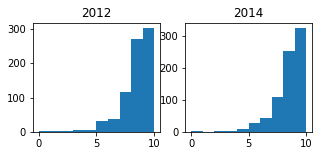

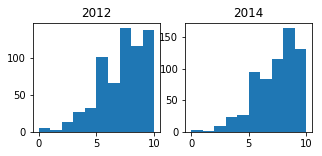

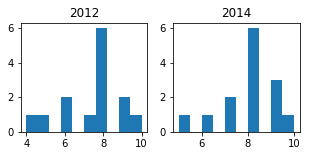

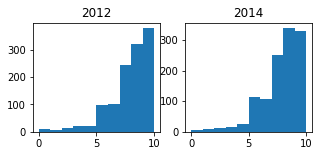

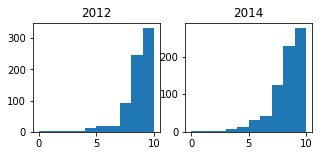

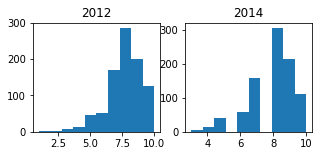

In [23]:
for country in countries:
    
    fig, ax1 = plt.subplots(1, 2, figsize=(5, 2))

    ax1[0].hist(df['happy'][(df['cntry'] == country) & (df['year']==6)].dropna())
    ax1[1].hist(df['happy'][(df['cntry'] == country) & (df['year']==7)].dropna())


    
    ax1[0].set_title('2012')
    ax1[1].set_title('2014')
    
    plt.show()

In [25]:
for country in countries:
    print(country)
    print('2012 mean: {0:.2f}'.format(df['happy'][(df['cntry'] == country) & (df['year']==6)].mean()))
    print('2014 mean: {0:.2f}'.format(df['happy'][(df['cntry'] == country) & (df['year']==7)].mean()))  
    print(stats.wilcoxon(df['happy'][(df['cntry'] == country) & (df['year']==6)], 
                         df['happy'][(df['cntry'] == country) & (df['year']==7)]
                        ))

CH
2012 mean: 8.09
2014 mean: 8.12
WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)
CZ
2012 mean: 6.77
2014 mean: 6.91
WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)
DE
2012 mean: 7.43
2014 mean: 7.86
WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)
ES
2012 mean: 7.55
2014 mean: 7.42
WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)
NO
2012 mean: 8.25
2014 mean: 7.92
WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)
SE
2012 mean: 7.91
2014 mean: 7.95
WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)


C:\Users\ankush\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
C:\Users\ankush\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


The above stats shows that the happiness increased from 2012 to 2014 except two countries Spain and Denmark.But if we check p value, all of the countries except Czech and Spain have p value more than 0.05% which means that this experiment cannot be considered.

# Who reported watching more TV in 2012, men or women?

In [27]:
df.head()
#Consider gender 1 = male
#Consider gender 2 = male

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


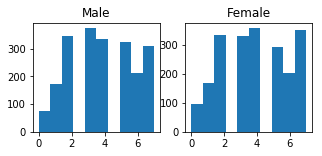

In [28]:
df_male = df['tvtot'][(df['gndr'] == 1.0) & (df['year'] == 6)]
df_female = df['tvtot'][(df['gndr'] == 2.0) & (df['year'] == 6)]

fig, ax1 = plt.subplots(1, 2, figsize=(5, 2))

ax1[0].hist(df_male)
ax1[1].hist(df_female)

ax1[0].set_title('Male')
ax1[1].set_title('Female')
    
plt.show()

In [34]:
print('2012 mean: {0:.2f}' .format(df['tvtot'][(df['gndr'] == 1.0) & (df['year'] == 6)].mean()))
print('2014 mean: {0:.2f}' .format(df['tvtot'][(df['gndr'] == 1.0) & (df['year'] == 7)].mean()))
print(stats.ttest_ind(df['tvtot'][(df['gndr'] == 1.0) & (df['year'] == 6)], 
                          df['tvtot'][(df['gndr'] == 2.0) & (df['year'] == 6)],nan_policy='omit'))

2012 mean: 3.90
2014 mean: 3.75
Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.49023604027095813)


It looks like mean for 2012 is more than 2014 which means people watched more tv in 2012 than in 2014.P- value seems to be poor as well, which means this experimentation can be ignored.

# Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?


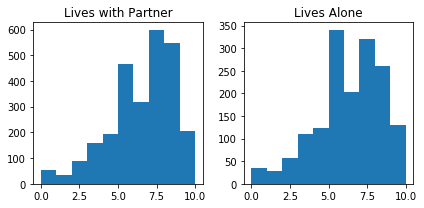

In [35]:
partner = df['pplfair'][(df['partner'] == 1.0) & (df['year'] == 6)]
alone = df['pplfair'][(df['partner'] == 2.0) & (df['year'] == 6)]

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].hist(partner.dropna())
axs[1].hist(alone.dropna())

axs[0].set_title('Lives with Partner')
axs[1].set_title('Lives Alone')
    
plt.tight_layout()
plt.show()

In [36]:
print('Lives with partner mean: {0:.2f}'.format(partner.mean()))
print('Lives alone mean: {0:.2f}'.format(alone.mean()))  
print(stats.ttest_ind(partner,  alone, nan_policy='omit'))

Lives with partner mean: 6.08
Lives alone mean: 5.86
Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609876207)


It looks like people living alone are fair than people living with patner in 2012.P-value looks to be good as well.

# Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [37]:
ES_meet = df['sclmeet'][(df['cntry'] == 'ES') & (df['year'] == 7)].dropna()
NO_meet = df['sclmeet'][(df['cntry'] == 'NO') & (df['year'] == 7)].dropna()
SE_meet = df['sclmeet'][(df['cntry'] == 'SE') & (df['year'] == 7)].dropna()

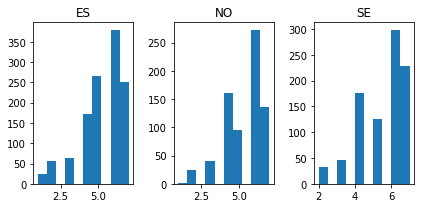

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(6, 3))

axs[0].hist(ES_meet)
axs[1].hist(NO_meet)
axs[2].hist(SE_meet)
axs[0].set_title('ES')
axs[1].set_title('NO')
axs[2].set_title('SE')
    
plt.tight_layout()
plt.show()

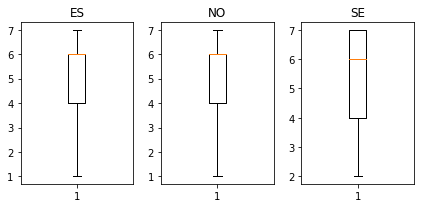

In [39]:

fig, axs = plt.subplots(1, 3, figsize=(6, 3))

axs[0].boxplot(ES_meet)
axs[1].boxplot(NO_meet)
axs[2].boxplot(SE_meet)
axs[0].set_title('ES')
axs[1].set_title('NO')
axs[2].set_title('SE')
    
plt.tight_layout()
plt.show()

In [40]:
F, p = stats.f_oneway(ES_meet,NO_meet,SE_meet)
# The F statistic.
print(F)
# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population.
print(p)

3.726110434690217
0.02420388186106648


if we see above, p-value is less than 0.05% so that means that the group means are not similar in the population

In [44]:
print('Czech Republic mean: ' ,(ES_meet.mean()))
print('Norway mean: ' ,(NO_meet.mean()))
print('Sweden mean: ' ,(SE_meet.mean()))

Czech Republic mean:  5.2601156069364166
Norway mean:  5.3023255813953485
Sweden mean:  5.426211453744493


In [46]:
print(stats.ttest_ind(ES_meet, NO_meet))
print(stats.ttest_ind(NO_meet, SE_meet))
print(stats.ttest_ind(ES_meet, SE_meet))

Ttest_indResult(statistic=-0.632916395870007, pvalue=0.5268628350318294)
Ttest_indResult(statistic=-1.8305856428076237, pvalue=0.06734412432597783)
Ttest_indResult(statistic=-2.649547268580078, pvalue=0.00811992279651295)


There are significant differences between groups based on the one way ANOVA. Using an independent t-test , it looks like there is a significant difference in social encounters between Spain (ES) and Sweden (SE), with Sweden having more social encounters.

# Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [51]:
ES_act = df['sclact'][(df['cntry'] == 'ES') & (df['year'] == 7)].dropna()
NO_act = df['sclact'][(df['cntry'] == 'NO') & (df['year'] == 7)].dropna()
SE_act = df['sclact'][(df['cntry'] == 'SE') & (df['year'] == 7)].dropna()

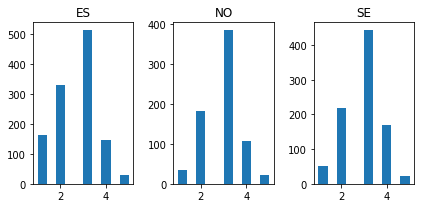

In [52]:

fig, axs = plt.subplots(1, 3, figsize=(6, 3))

axs[0].hist(ES_act)
axs[1].hist(NO_act)
axs[2].hist(SE_act)
axs[0].set_title('ES')
axs[1].set_title('NO')
axs[2].set_title('SE')
    
plt.tight_layout()
plt.show()

In [53]:
F, p = stats.f_oneway(ES_act, NO_act, SE_act)
print('F statistic:', F, '\np-value:', p)

F statistic: 27.753885475253163 
p-value: 1.1583945951240228e-12


In [54]:
F, p = stats.f_oneway(ES_act, NO_act, SE_act)
print('F statistic:', F)
print('p value:', p)

F statistic: 27.753885475253163
p value: 1.1583945951240228e-12


In [55]:
print(stats.ttest_ind(ES_act, NO_act))
print(stats.ttest_ind(ES_act, SE_act))
print(stats.ttest_ind(SE_act, NO_act))

Ttest_indResult(statistic=-5.671149129663532, pvalue=1.6345881270312057e-08)
Ttest_indResult(statistic=-6.500257345866597, pvalue=1.000080729987386e-10)
Ttest_indResult(statistic=0.4823216270234106, pvalue=0.6296421272017451)


P- values for ANOVA and p values of t-test are more than 0.05% ,which means that there are no difference between the groups